<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
We will use Lasso to reduce the Features and use Grid Search to tune theLAsso.

Once we have our featyures we will feed thm into Linear Regression

# Library

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
import plotly.express as px 
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import seaborn as sns

# Data

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


What happends on Monday has some influence on what happens on Tuesday.  Even if we are not going to scale the date column we cannot process the data set as is .  We need to change the format of  the date column.  There are a few ways of doing this including converting them into arbtriry numbers.  We chose to convert our dates to ORDINAL.  This maintains some relation between the numbers.  In the future we will explore Facebook's Prophet approach to dates.


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

Feature List

In [ ]:
feature_list = data.loc[: ,data.columns != 'Quantity']
features = list(feature_list)
data.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,736330,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,736361,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,736389,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,381

Last round we peeled off the data column , scaled the data, then re-attached the date column. Might have guessed that Python had an esier way to approach this.

In [ ]:
# except B, take all columns
#cols = df.columns.difference(['B'])
#
cols =data.columns.difference(['date'])

# Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# normalise only selected columns
#df[cols] = sc.fit_transform(df[cols])
#
data[cols] = sc.fit_transform(data[cols])

The date column is Ordinal while the rest of the 943 Features are scaled

In [ ]:
data.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,736330,1.539880,0.703768,-1.632022,-0.889269,-0.528241,-1.103651,-0.287798,-1.101781,0.016399,-0.966155,-0.621275,-0.553653,-0.536381,-0.598653,-0.844779,1.901225,0.728906,-0.754819,2.388963,-0.944942,-0.457605,-0.111201,-0.687592,-1.480974,-2.156877,-0.465022,-0.035719,-0.466215,0.433547,2.497895,-0.991226,-1.232210,-1.831242,-0.868114,-0.447471,0.574186,1.565983,-0.307755,-0.863563,...,-1.053966,0.078346,-1.394121,1.266696,-1.108110,-0.624929,-0.245088,-0.776366,-0.902077,0.527733,-1.466087,1.210525,-0.725630,-0.460762,0.388959,0.732856,0.044353,1.414693,-0.772702,1.753148,-0.299252,-0.934209,-0.431109,-0.055554,0.038088,0.145483,-1.766711,0.619969,-1.080612,-1.414953,-0.862847,-1.618821,-0.829065,-0.536741,-1.656385,0.501004,-1.506361,-0.394158,1.357242,0.380225
1,736361,0.110421,0.325418,-1.579833,0.226266,0.580418,-0.737166,1.359021,-0.859717,1.388236,-0.090003,0.066074,0.352555,-0.137113,0.353344,-0.470100,1.784625,0.728906,-0.754819,2.073044,-1.130383,-0.363636,-0.007877,-0.608165,-0.985189,-1.363913,-0.365731,-0.403188,1.136662,-1.261025,-0.744487,-1.477211,-1.406964,-0.376515,-0.829790,-1.576824,-0.897072,0.109178,0.761352,-0.959579,...,0.292836,1.272364,-0.174010,2.245952,0.223510,-0.800223,-0.470325,-0.634713,-1.035486,0.026740,-1.331254,1.218904,-1.084725,-0.602152,-0.224741,-0.774801,-0.892580,0.473138,-1.460572,1.138999,-0.709756,-0.461524,0.379834,0.724051,0.027079,1.487196,-0.727822,1.731090,-0.300246,-0.903358,-0.409989,-0.045720,0.038952,0.117254,-1.685606,0.597652,-1.030819,-0.653725,-0.736788,0.120324
2,736389,-1.314169,-0.250193,-1.505126,0.007910,0.163966,-0.385724,0.501915,-0.403552,0.500870,0.415460,0.612165,0.692095,0.385513,0.992317,0.124403,1.689888,0.728906,-0.754819,1.539249,-0.948358,-0.594287,-0.301490,-0.770505,-0.716289,-1.212872,-0.100955,-0.642296,0.050155,-0.751032,-0.258268,-1.308589,-0.791415,-0.659020,-0.662823,0.229459,0.304524,0.176521,-1.117497,-1.196299,...,-1.261519,-0.034381,-1.322262,0.710995,-1.107407,-0.222414,0.547229,1.285348,0.302120,1.282045,-0.130459,2.189370,0.241106,-0.778673,-0.456993,-0.632586,-1.028030,-0.035971,-1.321413,1.147133,-1.070086,-0.602985,-0.240056,-0.844457,-0.916897,0.454280,-1.396862,1.114885,-0.711088,-0.438214,0.395311,0.724021,0.027951,1.528374,-0.666388,1.712914,-0.267264,-0.394158,-0.736788,0.640126


Split the data into Training and Testing

In [ ]:
y = data['Quantity']

X is every other Feature EXCEPT Quantity



In [ ]:
X = data.loc[: ,data.columns != 'Quantity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Here we use Lasso and grid search to optimize paramerters to identify the best features.  

Then we will use these features in Linear Regression

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

Here is where the Grid search does its magic.  It increments through LAsso parameters.

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.485 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.725 total time=   0.1s
[CV 3/5] END .................model__alpha=0.1;, score=-1.603 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.670 total time=   0.1s
[CV 5/5] END .................model__alpha=0.1;, score=-0.731 total time=   0.1s
[CV 1/5] END .................model__alpha=0.2;, score=-0.384 total time=   0.1s
[CV 2/5] END .................model__alpha=0.2;, score=-0.776 total time=   0.1s
[CV 3/5] END .................model__alpha=0.2;, score=-1.801 total time=   0.1s
[CV 4/5] END .................model__alpha=0.2;, score=-0.726 total time=   0.1s
[CV 5/5] END .................model__alpha=0.2;, score=-0.480 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.433 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
search.best_params_ # <<--- Best Alpha setting?

{'model__alpha': 0.2}

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
importance = np.abs(coefficients)

Here are the features that we will subset the original dataframe by and run the regression on

In [ ]:
np.array(features)[importance > 0]

array(['Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', 'IEClag_5', 'ISElag_6',
       'Gray_cement_dispatch_Factorylag_9', 'ICElag_9',
       'Housing_total_sales', 'Housing_total_initiation_SIlag_24',
       'Ordinary_creditlag_4', 'Ordinary_creditlag_6', 'working_day'],
      dtype='<U37')

In [ ]:
Selected_Features = ['Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', 'IEClag_5', 'ISElag_6',
       'Gray_cement_dispatch_Factorylag_9', 'ICElag_9',
       'Housing_total_sales', 'Housing_total_initiation_SIlag_24',
       'Ordinary_creditlag_4', 'Ordinary_creditlag_6', 'working_day']

Here we do the subsetting on the original dataset

In [ ]:
Data_Selected_Features= data[['Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', 'IEClag_5', 'ISElag_6',
       'Gray_cement_dispatch_Factorylag_9', 'ICElag_9',
       'Housing_total_sales', 'Housing_total_initiation_SIlag_24',
       'Ordinary_creditlag_4', 'Ordinary_creditlag_6', 'working_day']]

In [ ]:
Data_Selected_Features.head(5)

,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,IEClag_5,ISElag_6,Gray_cement_dispatch_Factorylag_9,ICElag_9,Housing_total_sales,Housing_total_initiation_SIlag_24,Ordinary_creditlag_4,Ordinary_creditlag_6,working_day
0,1.539880,0.703768,-0.536381,-0.687592,1.924774,0.460644,-1.116803,0.730226,-0.332817,0.365681,3.509835,0.073968,-1.036124,0.380225
1,0.110421,0.325418,-0.137113,-0.608165,-0.287215,0.490565,-0.486370,0.430597,-0.003557,0.058559,0.195179,-0.607762,0.532574,0.120324
2,-1.314169,-0.250193,0.385513,-0.770505,-1.573761,0.121533,-0.405960,0.595459,0.342166,-0.196743,-0.521055,1.294314,0.035312,0.640126
3,-2.091651,-2.371991,-0.872854,-0.594309,-0.738789,0.071664,-0.439439,0.120006,-0.157212,-0.483326,-0.641977,1.240614,-0.670478,-0.139576
4,-0.631964,-0.621405,-0.260166,-0.575749,0.417245,-1.065354,-0.374134,0.459552,0.095221,-0.525666,0.216209,-1.798361,1.298727,0.380225


In [43]:
Data_Selected_Features.shape
# Familiar number of rows , new number of columns.

(54, 14)

# Re-start the process 

Start the process all over again with the reduced data set

In [ ]:
y = Data_Selected_Features['Quantity']

In [ ]:
X = Data_Selected_Features.loc[: , Data_Selected_Features.columns != 'Quantity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now Model the data

In [ ]:
from sklearn.linear_model import  LinearRegression

In [ ]:
model = LinearRegression(normalize = True)

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

Here are the coefficients

In [ ]:
feature_list = data.loc[: ,data.columns != 'Quantity']

In [ ]:
feature_list = data.loc[: ,data.columns != 'Quantity']

In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['feature_list'])
coeff_df

,feature_list
Seasonal,0.149326
Gray_cement_dispatch_comercial,-0.095270
ISE,0.289403
Construction_lic_area/unt_SIlag_4,0.235507
IEClag_5,0.154210
ISElag_6,-0.073062
Gray_cement_dispatch_Factorylag_9,0.063886
ICElag_9,-0.273694
Housing_total_sales,0.265080
Housing_total_initiation_SIlag_24,0.076870


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([ 0.10323954,  1.47316237,  1.81829644, -0.25784569,  0.44582262,
       -1.29257859, -0.3440217 ,  1.25906885, -0.7196844 ,  0.06561056,
        0.37914486, -0.22504384, -0.05087143, -0.38591761,  0.29264759,
       -0.19700484, -0.07054598,  0.99181943])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
19,0.283832,0.103240
49,0.938572,1.473162
48,0.372061,1.818296
12,0.251431,-0.257846
44,0.668642,0.445823
5,-1.076556,-1.292579
17,-0.819213,-0.344022
52,-0.469549,1.259069
3,-2.091651,-0.719684
32,0.817405,0.065611


In [ ]:
df['index1'] = df.index

In [ ]:
df.shape

(18, 3)

In [ ]:
DF_sorted = df.sort_values(["index1","Actual", "Predicted"] , ascending= True)
DF_sorted

,Actual,Predicted,index1
3,-2.091651,-0.719684,3
4,-0.631964,-0.197005,4
5,-1.076556,-1.292579,5
6,0.328619,-0.385918,6
8,-0.847334,-0.225044,8
12,0.251431,-0.257846,12
13,-0.446639,0.379145,13
17,-0.819213,-0.344022,17
19,0.283832,0.103240,19
24,0.817616,0.991819,24


In [ ]:
# I've got my predictions now
y_hats = model.predict(X_test)

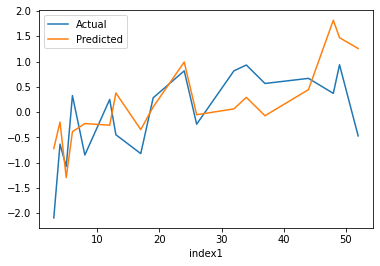

In [ ]:
#pd.options.plotting.backend = "plotly"
DF_sorted.plot(x='index1', y=['Actual', 'Predicted'])